## Statistical Machine Learning. Support Vector Classification

#### SVM library import

In [7]:
from sklearn import svm
import numpy as np
from sklearn.datasets import load_svmlight_file
import pandas as pd
import matplotlib.pyplot as plt

#### Support Vector Machine Functions


In [56]:
    def load_training_data():
        trn_kernel_output, training_y_labels = load_svmlight_file("trn_kernel_mat.svmlight")
        trn_kernel_output = trn_kernel_output.todense()
        return trn_kernel_output, training_y_labels
        
    def load_validation_data():
        val_kernel_output, val_y_labels = load_svmlight_file("val_kernel_mat.svmlight")
        val_kernel_output = val_kernel_output.todense()
        return val_kernel_output, val_y_labels
        
    def load_test_data():
        test_kernel_output, test_y_labels = load_svmlight_file("tst_kernel_mat.svmlight")
        test_kernel_output = test_kernel_output.todense()
        return test_kernel_output, test_y_labels
        
    def model_training(C, kernel_output, y_label):
        svm_classifier = svm.SVC(C, kernel='precomputed')
        svm_classifier.fit(kernel_output,y_label)
        training_prediction = svm_classifier.predict(kernel_output)
        print("the n support vectors :", svm_classifier.n_support_, "for C: ", C)
        return svm_classifier

    def model_prediction(svm_classifier, data):
        the_prediction = svm_classifier.predict(data)
        return the_prediction
        
    def model_empirical_error(the_prediction, y_labels):
        delta_output = the_prediction-y_labels
        error_svm = np.count_nonzero(delta_output)/len(the_prediction)
        print("  And the error is: ", error_svm)
        return error_svm
    def iterator(data_1, data_2):
        c = [0.01, 0.1, 1, 10, 100]
        for c_iterator in c:
            the_classifier = model_training(c_iterator, trn_x, trn_y)
            a_prediction = model_prediction(the_classifier, data_1)
            error = model_empirical_error(a_prediction, data_2)
            dict_for_values_training[c_iterator] = error
            #print(dict_for_values_training)
        return dict_for_training_values
        
    
    

#### Data Collection
##### Training error for different C-values {0.01, 0.1, 1, 10, 100}


In [ ]:
#load the data
trn_x, trn_y = load_training_data()
#train the model for different C-values
training_results = iterator(trn_x, trn_y)

#### Validation Test. (Using Validation Data)

In [ ]:
# Load the validation test
val_x, val_y = load_validation_data()
validation_results = iterator(val_x, val_y)


#### Testing the classifier with Test Data and the Best C from the previous Result

In [62]:
tst_x, tst_y = load_test_data()
c = 1
test_prediction = model_prediction(model_training(c, trn_x, trn_y), tst_x)
test_error = model_empirical_error(test_prediction, tst_y)

the n support vectors : [265 279] for C:  1
  And the error is:  0.0785


### For the Best C = 1, The Rs = 0.0785

#### Results consolidation 

In [61]:
training_values = {0.01: 0.245, 0.1: 0.132, 1: 0.038, 10: 0.002, 100: 0.0}
table_c_values = pd.DataFrame.from_dict(training_values, orient='index')
table_c_values.columns = ['Training Error for Each C']
validation_data ={0.01: 0.256, 0.1: 0.144, 1: 0.068, 10: 0.106, 100: 0.114}
table_c_values_val = pd.DataFrame.from_dict(validation_data, orient='index')
table_c_values_val.columns = ['Validation Error for each C']
support_vectors_each_c ={0.01: "[500  500]", 0.1: "[437  439]", 1: "[265  279]", 10: "[202  184]", 100: "[199 177]"}
table_s_v = pd.DataFrame.from_dict(support_vectors_each_c, orient = 'index')
table_s_v.columns = ['Number of Support Vector Error for each C']
result_table = pd.concat([table_c_values, table_c_values_val, table_s_v], axis=1, join_axes=[table_c_values.index])
result_table

,Training Error for Each C,Validation Error for each C,Number of Support Vector Error for each C
0.01,0.245,0.256,[500 500]
0.10,0.132,0.144,[437 439]
1.00,0.038,0.068,[265 279]
10.00,0.002,0.106,[202 184]
100.00,0.000,0.114,[199 177]


#### Training Error as a function of C

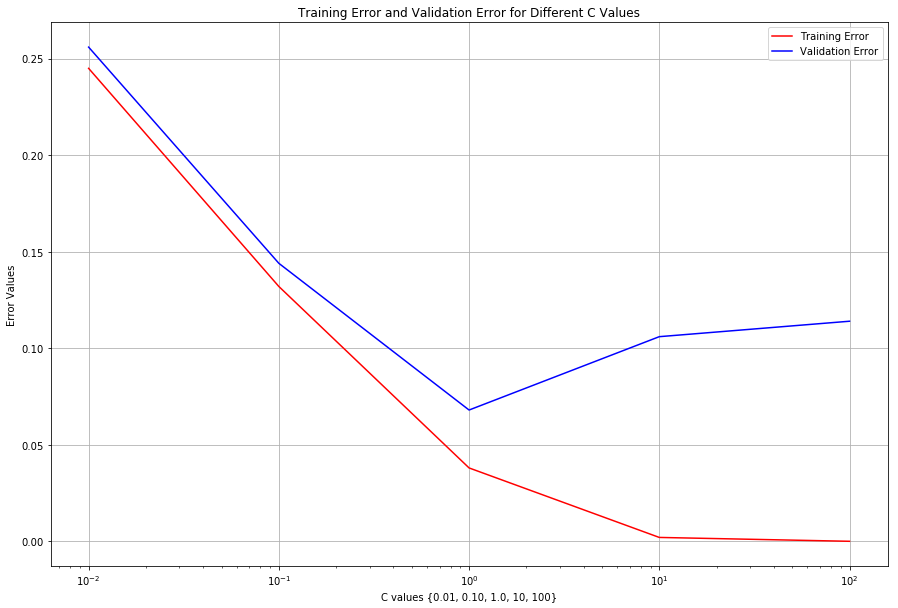

In [81]:
fig = plt.figure(figsize=(15,10))
plt.plot(table_c_values, 'r', label = "Training Error") 
plt.legend(loc='upper right')
plt.plot(table_c_values_val, 'b', label = 'Validation Error') 
plt.legend(loc='upper right')
plt.title('Training Error and Validation Error for Different C Values')
plt.xlabel('C values {0.01, 0.10, 1.0, 10, 100}')
plt.ylabel('Error Values')
plt.xscale('log')
plt.grid()
plt.show()

#### Validation Error as a Function of C

#### Training and Validation errors as function of C